In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Power consumption.csv to Power consumption.csv


In [ ]:
df = pd.read_csv("Power consumption.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

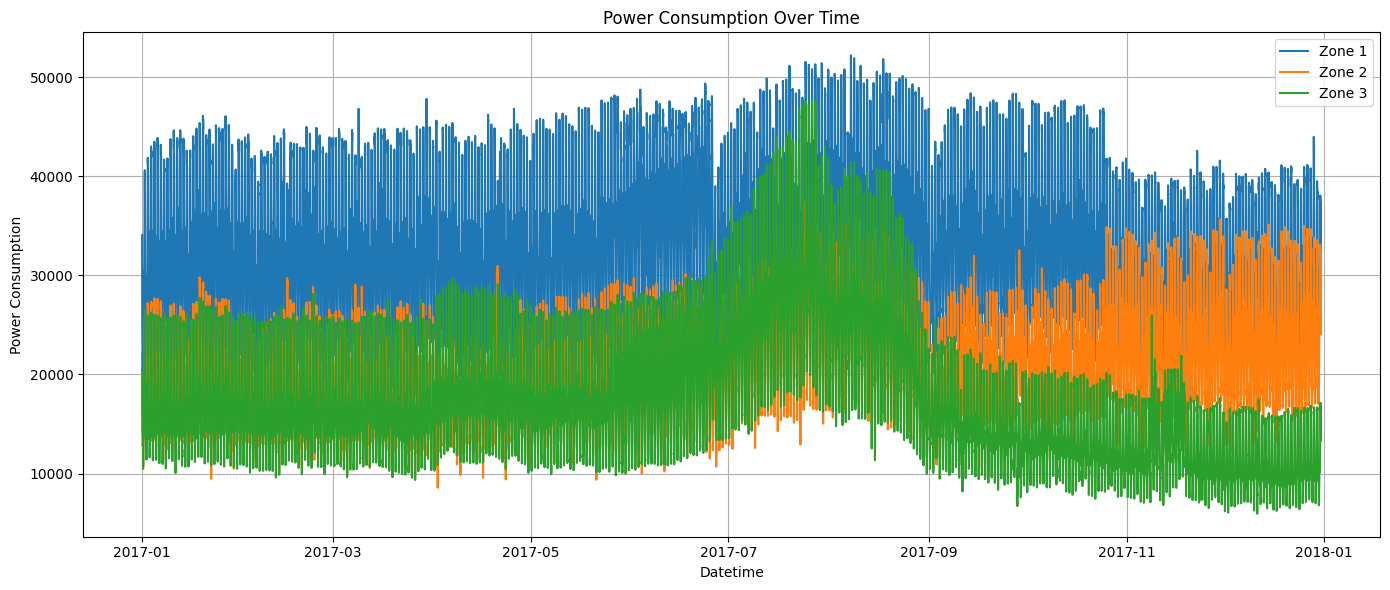

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df['PowerConsumption_Zone1'], label='Zone 1')
plt.plot(df['PowerConsumption_Zone2'], label='Zone 2')
plt.plot(df['PowerConsumption_Zone3'], label='Zone 3')
plt.title('Power Consumption Over Time')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

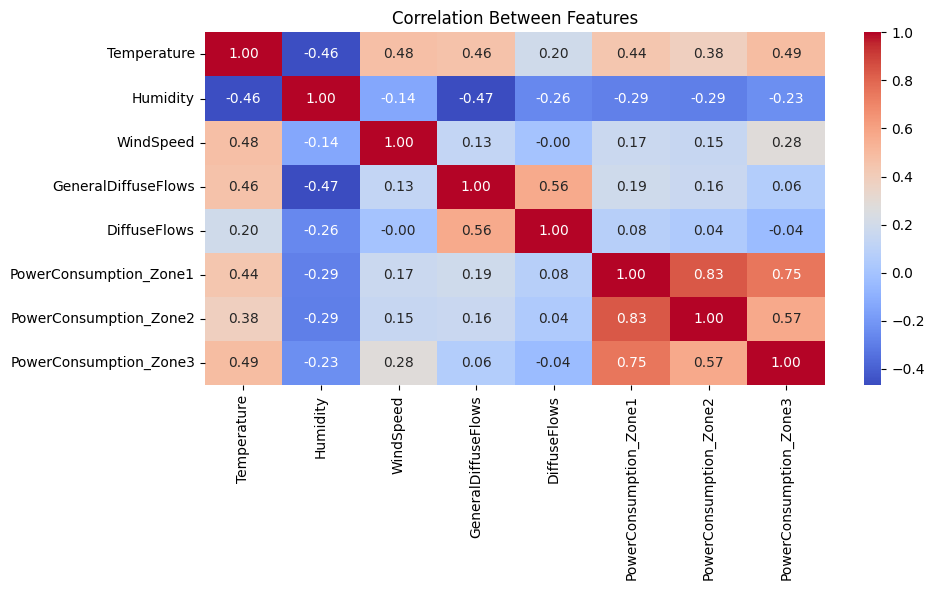

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

In [ ]:
features = df.drop(['PowerConsumption_Zone1'], axis=1)
target = df['PowerConsumption_Zone1']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, shuffle=False)

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM, Dropout

In [ ]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 931408640.0000
Epoch 2/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 44625596.0000
Epoch 3/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 39395288.0000
Epoch 4/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 33391294.0000
Epoch 5/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 26106244.0000
Epoch 6/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 18195910.0000
Epoch 7/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12641464.0000
Epoch 8/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 11052648.0000
Epoch 9/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 10480487.0000
Epoch 10/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 10132751.0000
Epoch 11/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10014357.0000
Epoch 12/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9581124.0000
Epoch 13/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 9336715.0000
Epoch 14/

In [ ]:
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_cnn).flatten()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1311/1311 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1146082688.0000
Epoch 2/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1138160128.0000
Epoch 3/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1136535552.0000
Epoch 4/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 1131721600.0000
Epoch 5/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1120711680.0000
Epoch 6/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1124101248.0000
Epoch 7/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1115069440.0000
Epoch 8/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1110872448.0000
Epoch 9/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1108375680.0000
Epoch 10/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1103530112.0000
Epoch 11/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1099741056.0000
Epoch 12/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1095944192.0000
Epoch 13/20
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 109

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n🔎 {name} Evaluation:")
    print("📉 MAE:", mean_absolute_error(y_true, y_pred))
    print("📉 RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("📈 R² Score:", r2_score(y_true, y_pred))

In [ ]:
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("CNN", y_test, y_pred_cnn)
evaluate_model("LSTM", y_test, y_pred_lstm)


🔎 Random Forest Evaluation:
📉 MAE: 4571.764449644324
📉 RMSE: 5051.884173989421
📈 R² Score: 0.32880959916697294

🔎 XGBoost Evaluation:
📉 MAE: 3722.818420083371
📉 RMSE: 4467.275651401711
📈 R² Score: 0.47516296947732295

🔎 CNN Evaluation:
📉 MAE: 6482.271103551484
📉 RMSE: 6886.340003969716
📈 R² Score: -0.24714195731181166

🔎 LSTM Evaluation:
📉 MAE: 28123.14812385238
📉 RMSE: 28791.244213269238
📈 R² Score: -20.800167663168914


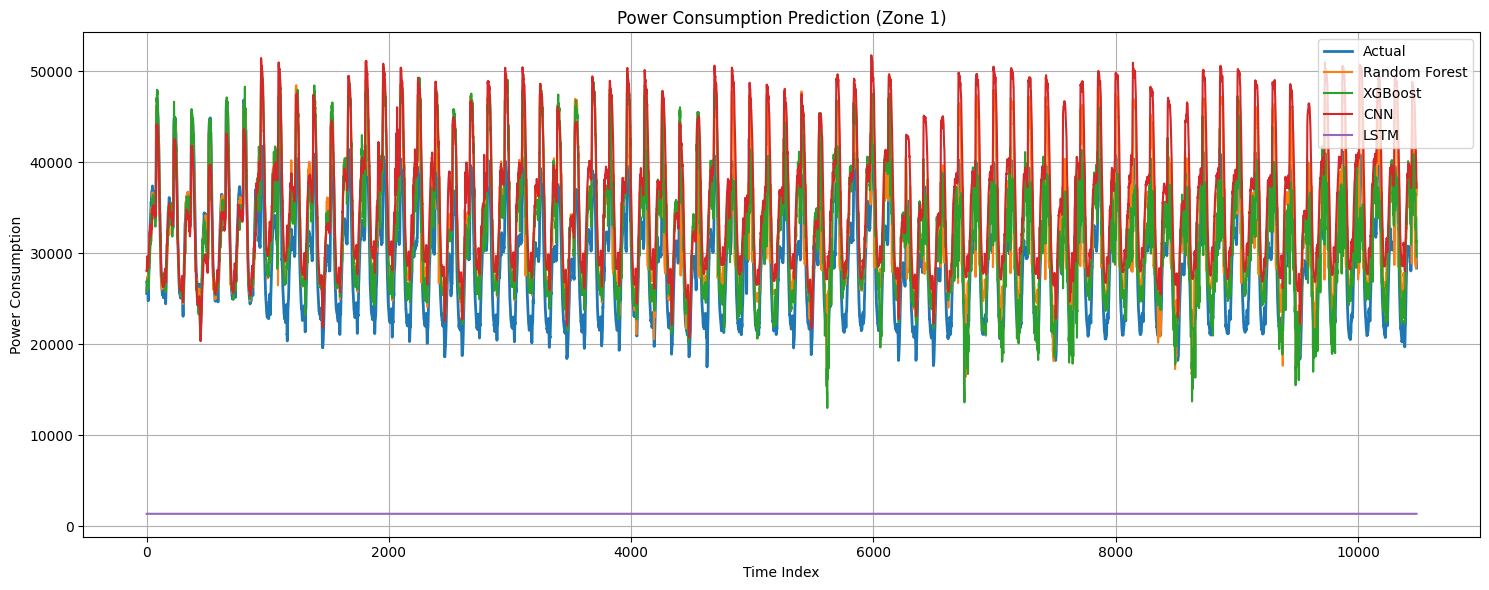

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred_rf, label='Random Forest')
plt.plot(y_pred_xgb, label='XGBoost')
plt.plot(y_pred_cnn, label='CNN')
plt.plot(y_pred_lstm, label='LSTM')
plt.title('Power Consumption Prediction (Zone 1)')
plt.xlabel('Time Index')
plt.ylabel('Power Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()